In [76]:
#Generic
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore

#Imputer
from sklearn.impute import SimpleImputer

#Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#PowerTransformer
from sklearn.preprocessing import PowerTransformer

#Scaler
from sklearn.preprocessing import MinMaxScaler

#TrainTestSplit
from sklearn.model_selection import train_test_split


#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

#Deep Learning
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
#Import Data
df=pd.read_csv('Skyserver.csv')

In [78]:
#Check head
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [79]:
#Check info
df.info()
#As we can see there are no null values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [80]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [81]:
#Check for columns with object datatype
df.select_dtypes('object').columns
#The only column which is in object type is target columns (class)

Index(['class'], dtype='object')

In [82]:
#As we can see the target column has more than two values so it is multi class classification problem
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [83]:
#Encode target class with LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

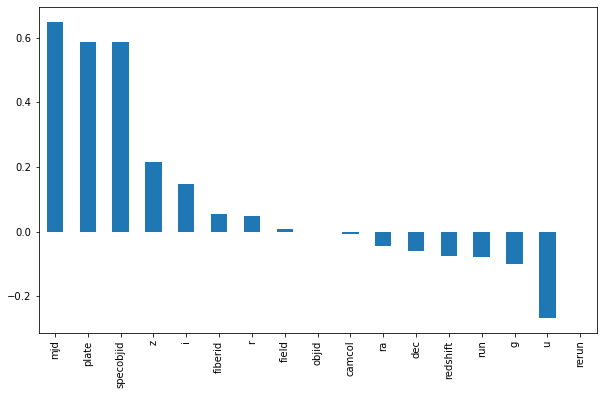

In [84]:
plt.figure(figsize=(10,6))
df.corr()['class'].drop('class').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [85]:
#There is only one value for rerun column so it will not help us to train any algorithm in the model
#Hence we will drop it
df['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

In [86]:
df=df.drop('rerun',axis=1)

In [87]:
df['objid'].value_counts()
#Similarly there is only one value in objid column and hence we will drop that too

1.237650e+18    10000
Name: objid, dtype: int64

In [88]:
df=df.drop('objid',axis=1)

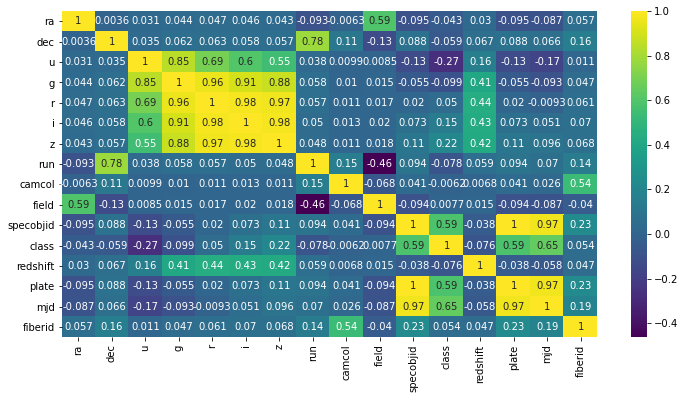

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

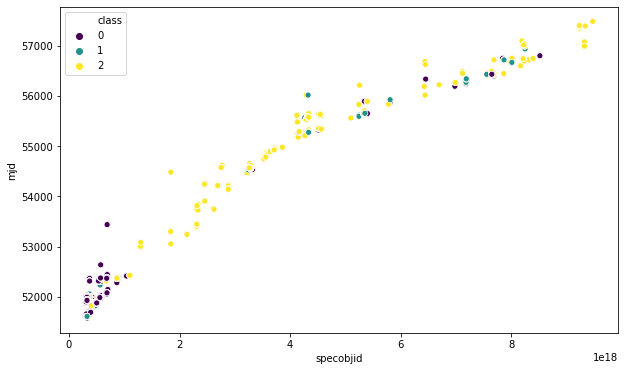

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='specobjid',y='mjd',data=df,hue='class',palette='viridis')
plt.show()
#mjd and specid are showing linear behaviour

In [91]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [92]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [93]:
df.shape

(10000, 16)

In [94]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [95]:
df.shape

(8698, 16)

In [96]:
pt=PowerTransformer()

In [98]:
for x in df.columns:
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x].values.reshape(-1,1))

In [99]:
df.skew()

ra          -0.130951
dec          0.255429
u           -1.083569
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.743172
class        0.292107
redshift     3.583415
plate        0.705819
mjd          0.948393
fiberid      0.065374
dtype: float64

In [101]:
df.isna().sum()

ra              0
dec          1069
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
class           0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [102]:
si=SimpleImputer()
df['dec']=si.fit_transform(df['dec'].values.reshape(-1,1))

In [103]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        #fpr,tpr,thresholds=roc_curve(y_test,predict)
        #acurve=auc(fpr,tpr)
#         f1=f1_score(y_test,predict)
        acc=accuracy_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if acc>max_score:
            max_score=acc
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [104]:
for x in df.columns:
    df[x]=round(df[x],4)

In [105]:
scale=MinMaxScaler()
X=df.drop('class',axis=1)
y=df['class']
X=scale.fit_transform(X)

In [106]:
#Call the function
model_select(LogisticRegression(max_iter=4000))

Max score is 0.9685823754789272 with random state 95


In [107]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.9237547892720307 with random state 85


In [108]:
#Call the function
model_select(SVC())

Max score is 0.9796934865900383 with random state 70


In [109]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.9877394636015325 with random state 85


In [110]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.9923371647509579 with random state 77


In [111]:
#Call the function
model_select(GaussianNB())

Max score is 0.9471264367816092 with random state 44


In [112]:
#Split Train and Test data as per the max score got in randomforest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)
model=RandomForestClassifier()
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [113]:
#Print metrics
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[1436    7    1]
 [  13  110    0]
 [   0    0 1043]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1444
           1       0.94      0.89      0.92       123
           2       1.00      1.00      1.00      1043

    accuracy                           0.99      2610
   macro avg       0.98      0.96      0.97      2610
weighted avg       0.99      0.99      0.99      2610



In [114]:
#Check cross validation
cross_val_score(model,X_train,y_train,cv=4).mean()
#As per the below score we can prove that data is not over/underfitting

0.9863666228646517

In [115]:
joblib.dump(model,'Space Server RandomForest.obj')

['Space Server RandomForest.obj']